In [1]:
import os
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib notebook

# r-band

In [2]:
bad = pd.read_csv('stat_badlist_r.csv')
good = pd.read_csv('stat_goodlist_r.csv')

In [3]:
ccd = 41

In [4]:
bad_s = bad.loc[bad['ccdnum'] == ccd]
bad_sl = bad.loc[(bad['ccdnum'] == ccd) & (bad['LR'] == 'L')]
bad_sr = bad.loc[(bad['ccdnum'] == ccd) & (bad['LR'] == 'R')]

In [5]:
good_s = good.loc[good['ccdnum'] == ccd]
good_sl = good.loc[(good['ccdnum'] == ccd) & (good['LR'] == 'L')]
good_sr = good.loc[(good['ccdnum'] == ccd) & (good['LR'] == 'R')]

In [6]:
bad_sl.head()

,expnum,ccdnum,nite,band,t_eff,section,x_image,y_image,mag_aper_4,a_image,...,number,mean,median,std,var,mad,ptp,npix,type,LR
0,771502,41,20180909,r,0.589,"[1024:1536,1:4096]",1420.994873,93.000847,14.366360,6.397277,...,2,46.389545,50.006374,10.156621,103.156944,5.101311,45.350788,291,angle,L
2,771502,41,20180909,r,0.589,"[1024:1536,1:4096]",1420.994873,93.000847,14.366360,6.397277,...,2,41.530445,42.955208,10.663889,113.718521,7.821552,45.350788,587,circ,L
4,771502,41,20180909,r,0.589,"[1024:1536,1:4096]",1460.469482,63.539707,14.273859,3.869415,...,24,65.038956,66.812523,10.028921,100.579254,4.512936,54.530426,108,angle,L
6,771502,41,20180909,r,0.589,"[1024:1536,1:4096]",1460.469482,63.539707,14.273859,3.869415,...,24,54.805584,60.407574,17.086046,291.932983,8.677681,71.091232,208,circ,L
8,771502,41,20180909,r,0.589,"[1024:1536,1:4096]",1227.239380,154.293884,13.868176,9.834829,...,72,50.378113,77.650246,42.249344,1785.007202,14.813622,105.518173,695,angle,L


In [7]:
bad_sl.columns

Index(['expnum', 'ccdnum', 'nite', 'band', 't_eff', 'section', 'x_image',
       'y_image', 'mag_aper_4', 'a_image', 'b_image', 'theta_image', 'number',
       'mean', 'median', 'std', 'var', 'mad', 'ptp', 'npix', 'type', 'LR'],
      dtype='object')

In [8]:
good_sl['nite'].unique()

array([20181115])

## Using half the circle

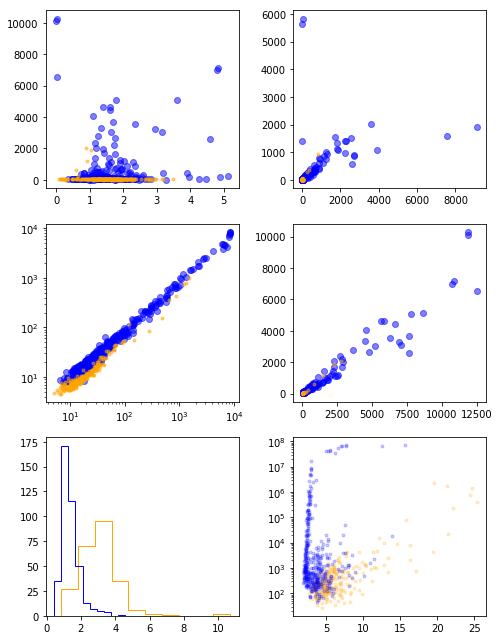

In [9]:
aux_bad_l = bad_sl.loc[bad_sl['type'] == 'circ']
aux_bad_r = bad_sr.loc[bad_sr['type'] == 'circ']
aux_good_l = good_sl.loc[good_sl['type'] == 'circ']
aux_good_r = good_sr.loc[good_sr['type'] == 'circ']

fig, ax = plt.subplots(3, 2, figsize=(7, 9))

ax[0, 0].scatter(aux_bad_l['mad'].values / aux_bad_r['mad'].values, aux_bad_r['mean'], 
                 c='orange', alpha=0.5, marker='.')
ax[0, 0].scatter(aux_good_l['mad'].values / aux_good_r['mad'].values, aux_good_r['mean'], 
                 c='blue', alpha=0.5, zorder=0)

ax[0, 1].scatter(aux_bad_l['mad'], aux_bad_r['mad'],
                 c='orange', alpha=0.5, marker='.')
ax[0, 1].scatter(aux_good_l['mad'], aux_good_r['mad'], 
                 c='blue', alpha=0.5, zorder=0)

# Variance and Std Dev splits the populations!
ax[1, 0].scatter(aux_bad_l['std'], aux_bad_r['std'], 
                 c='orange', alpha=0.5, marker='.')
ax[1, 0].scatter(aux_good_l['std'], aux_good_r['std'], 
                 c='blue', alpha=0.5, zorder=0)
ax[1, 0].set_yscale('log')
ax[1, 0].set_xscale('log')


# similar with MAD
ax[1, 1].scatter(aux_bad_l['mean'].values, aux_bad_r['mean'], 
                 c='orange', alpha=0.5, marker='.')
ax[1, 1].scatter(aux_good_l['mean'].values, aux_good_r['mean'], 
                 c='blue', alpha=0.5, zorder=0)

# Using mean, median, mad there is overlap
ax[2, 0].hist(aux_bad_l['var'].values / aux_bad_r['var'].values, color='orange', histtype='step')
ax[2, 0].hist(aux_good_l['var'].values / aux_good_r['var'].values, color='blue', histtype='step')
# ax[2, 0].hist(aux_bad_l['a_image'].values / aux_bad_r['b_image'].values, color='orange', histtype='step')
# ax[2, 0].hist(aux_good_l['a_image'].values / aux_good_r['b_image'].values, color='blue', histtype='step')



# ax[2, 1].scatter(aux_bad_l['ptp'], aux_bad_l['npix'], c='orange', alpha=0.5, marker='.')
# ax[2, 1].scatter(aux_good_l['ptp'], aux_good_l['npix'], c='blue', alpha=0.5, marker='o', zorder=0)
ax[2, 1].scatter(aux_bad_l['a_image'], aux_bad_l['var'], marker='.', c='orange', alpha=0.2)
ax[2, 1].scatter(aux_good_l['a_image'], aux_good_l['var'], marker='.', c='blue', alpha=0.2)
ax[2, 1].set_yscale('log')

plt.tight_layout()

## Using angular section

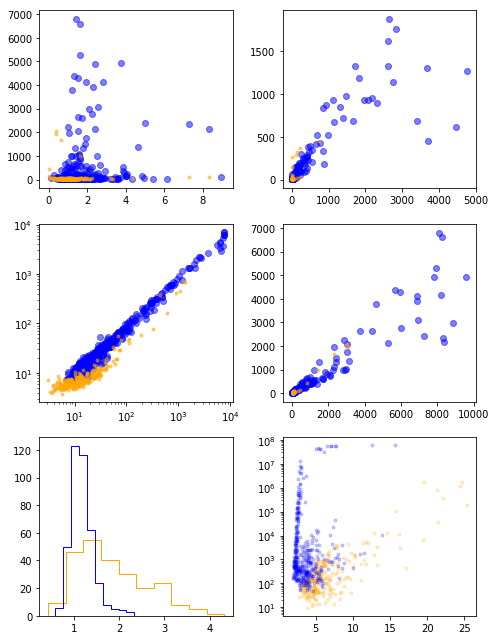

In [10]:
aux_bad_l = bad_sl.loc[bad_sl['type'] == 'angle']
aux_bad_r = bad_sr.loc[bad_sr['type'] == 'angle']
aux_good_l = good_sl.loc[good_sl['type'] == 'angle']
aux_good_r = good_sr.loc[good_sr['type'] == 'angle']

fig, ax = plt.subplots(3, 2, figsize=(7, 9))

ax[0, 0].scatter(aux_bad_l['mad'].values / aux_bad_r['mad'].values, aux_bad_r['mean'], 
                 c='orange', alpha=0.5, marker='.')
ax[0, 0].scatter(aux_good_l['mad'].values / aux_good_r['mad'].values, aux_good_r['mean'], 
                 c='blue', alpha=0.5, zorder=0)

ax[0, 1].scatter(aux_bad_l['mad'], aux_bad_r['mad'],
                 c='orange', alpha=0.5, marker='.')
ax[0, 1].scatter(aux_good_l['mad'], aux_good_r['mad'], 
                 c='blue', alpha=0.5, zorder=0)

# Variance and Std Dev splits the populations!
ax[1, 0].scatter(aux_bad_l['std'], aux_bad_r['std'], 
                 c='orange', alpha=0.5, marker='.')
ax[1, 0].scatter(aux_good_l['std'], aux_good_r['std'], 
                 c='blue', alpha=0.5, zorder=0)
ax[1, 0].set_yscale('log')
ax[1, 0].set_xscale('log')


# similar with MAD
ax[1, 1].scatter(aux_bad_l['mean'].values, aux_bad_r['mean'], 
                 c='orange', alpha=0.5, marker='.')
ax[1, 1].scatter(aux_good_l['mean'].values, aux_good_r['mean'], 
                 c='blue', alpha=0.5, zorder=0)

# Using mean, median, mad there is overlap
ax[2, 0].hist(aux_bad_l['std'].values / aux_bad_r['std'].values, color='orange', histtype='step')
ax[2, 0].hist(aux_good_l['std'].values / aux_good_r['std'].values, color='blue', histtype='step')

# ax[2, 1].hist(aux_bad_l['mad'].values / aux_bad_r['mean'].values, color='orange', histtype='step')#, c='orange', alpha=0.5, marker='.')
# ax[2, 1].hist(aux_good_l['mad'].values / aux_good_r['mean'].values, color='blue', histtype='step')#, c='blue', alpha=0.5, marker='o', zorder=0)
ax[2, 1].scatter(aux_bad_l['a_image'], aux_bad_l['var'], marker='.', c='orange', alpha=0.2)
ax[2, 1].scatter(aux_good_l['a_image'], aux_good_l['var'], marker='.', c='blue', alpha=0.2)
ax[2, 1].set_yscale('log')

plt.tight_layout()

## All r-band for Y6E1

In [11]:
dr = pd.read_csv('stat_r.csv')
dr_s = dr.loc[dr['ccdnum'] == 41]

In [12]:
dr_sl = dr_s.loc[dr_s['LR'] == 'L']
dr_sr = dr_s.loc[dr_s['LR'] == 'R']

In [13]:
dr_sl.head()

,expnum,ccdnum,nite,band,t_eff,section,x_image,y_image,mag_aper_4,a_image,...,number,mean,median,std,var,mad,ptp,npix,type,LR
0,771183,41,20180908,r,1.31,"[1024:1536,1:4096]",1446.998779,83.478836,13.591730,8.943423,...,2,77.123085,104.081688,50.033508,2503.351807,18.704414,141.980362,562,angle,L
2,771183,41,20180908,r,1.31,"[1024:1536,1:4096]",1446.998779,83.478836,13.591730,8.943423,...,2,54.094402,31.753527,48.692562,2370.965576,31.195150,141.980362,1109,circ,L
4,771183,41,20180908,r,1.31,"[1024:1536,1:4096]",1144.489014,200.457916,14.802507,4.610508,...,168,36.938385,37.544086,4.419959,19.536034,3.235420,27.309610,147,angle,L
6,771183,41,20180908,r,1.31,"[1024:1536,1:4096]",1144.489014,200.457916,14.802507,4.610508,...,168,31.274727,34.053577,8.426234,71.001427,4.714264,34.311394,287,circ,L
8,771183,41,20180908,r,1.31,"[1024:1536,1:4096]",1479.602783,231.629410,14.496975,3.516652,...,199,36.686764,50.049488,21.911495,480.113647,12.356953,64.793015,89,angle,L


Circular section

In [14]:
if False:
    aux_l = dr_sl.loc[dr_sl['type'] == 'circ']
    aux_r = dr_sr.loc[dr_sr['type'] == 'circ']

    aux_bad_l = bad_sl.loc[bad_sl['type'] == 'circ']
    aux_bad_r = bad_sr.loc[bad_sr['type'] == 'circ']

    fig, ax = plt.subplots(3, 2, figsize=(7, 9))

    # ax[0, 0].scatter(aux_l['mad'].values / aux_r['mad'].values, aux_r['mean'], 
    #                  c='orange', alpha=0.5, marker='.')
    ax[0, 0].scatter(aux_l['mad'].values / aux_r['mad'].values, aux_r['mean'], 
                     c='blue', alpha=0.5, zorder=0)
    ax[0, 0].set_xlim([-10, 30])

    # ax[0, 1].scatter(aux_l['mad'], aux_r['mad'],
    #                  c='orange', alpha=0.5, marker='.')
    ax[0, 1].scatter(aux_l['mad'], aux_r['mad'], 
                     c='blue', alpha=0.5, zorder=0)


    # Variance and Std Dev splits the populations!
    # ax[1, 0].scatter(aux_l['std'], aux_r['std'], 
    #                  c='orange', alpha=0.5, marker='.')
    ax[1, 0].scatter(aux_l['var'], aux_r['var'], 
                     c='blue', alpha=0.5, zorder=0)
    ax[1, 0].scatter(aux_bad_l['var'], aux_bad_r['var'], 
                     c='orange', alpha=0.5, marker='.')
    ax[1, 0].set_yscale('log')
    ax[1, 0].set_xscale('log')


    # similar with MAD
    # ax[1, 1].scatter(aux_l['mean'].values, aux_r['mean'].values, 
    #                  c='orange', alpha=0.5, marker='.')
    ax[1, 1].scatter(aux_l['mean'].values, aux_r['mean'].values, 
                     c='blue', alpha=0.5, zorder=0)

    # Using mean, median, mad there is overlap
    # ax[2, 0].hist(aux_l['std'].values / aux_r['std'].values, color='orange', histtype='step')
    ax[2, 0].hist(aux_l['std'].values / aux_r['std'].values, color='blue', histtype='step')

    # ax[2, 1].hist(aux_l['mad'].values / aux_r['mean'].values, color='orange', histtype='step')#, c='orange', alpha=0.5, marker='.')
    ax[2, 1].scatter(aux_l['a_image'].values , aux_l['var'].values, color='blue')#, c='blue', alpha=0.5, marker='o', zorder=0)

    plt.tight_layout()

    plt.show()

## Procedure
Using the distribution of known bad exposures, fit a linear regression and then translate the straight line to split the populations. Use the variance left vs right for this, with the half circle for region

**Variance vs variance in log-log**

Using bechmarks to create the linear fit for classification

Text(0,0.5,'log( var(circle, right) )')

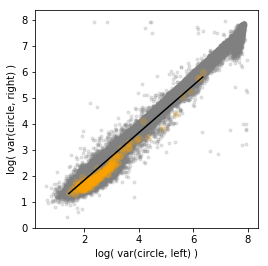

In [15]:
ref_l = bad_sl.loc[bad_sl['type'] == 'circ']
ref_r = bad_sr.loc[bad_sr['type'] == 'circ']

slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(ref_l['var'].values), np.log10(ref_r['var'].values))
f = lambda x: slope * x + intercept + 0.25

# left vs right
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(np.log10(ref_l['var']), np.log10(ref_r['var']), marker='o', color='orange', alpha=0.2)

# comparison
ax.scatter(np.log10(dr_sl['var']), np.log10(dr_sr['var']), marker='.', color='gray', alpha=0.2, zorder=0)

x = np.linspace(np.log10(ref_l['var']).min(), np.log10(ref_l['var']).max())
ax.plot(x, f(x), 'k-')

ax.set_xlabel('log( var(circle, left) )')
ax.set_ylabel('log( var(circle, right) )')

**Semi-major axis vs variance in log-log**

In [16]:
sel_l = dr_sl.loc[dr_sl['type'] == 'circ']
sel_r = dr_sr.loc[dr_sr['type'] == 'circ']

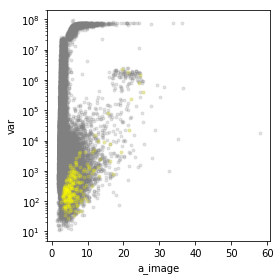

In [17]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.scatter(sel_l['a_image'], sel_l['var'], marker='.', c='gray', alpha=0.2)
ax.scatter(bad_sl.loc[bad_sl['type'] == 'circ', 'a_image'], 
           bad_sl.loc[bad_sl['type'] == 'circ', 'var'], 
           marker='.', c='yellow', alpha=0.2)

ax.set_xlabel('a_image')
ax.set_ylabel('var')
ax.set_yscale('log')
plt.tight_layout()

**Ratio variance left/right**

In [18]:
sel_l = dr_sl.loc[dr_sl['type'] == 'circ']
sel_r = dr_sr.loc[dr_sr['type'] == 'circ']

Text(0.5,0,'var(left) / var(right)')

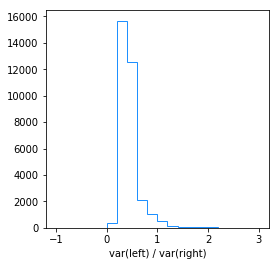

In [19]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.hist(sel_l['std'].values / sel_l['mean'].values, 
        color='dodgerblue', histtype='step', range=(-1,3), bins=20)#bins=20, cumulative=1, normed=1)

#ax.axvline(3., color='green')
ax.set_xlabel('var(left) / var(right)')

# Double-checking all

(array([2.1828e+04, 6.3820e+03, 2.3420e+03, 1.2670e+03, 6.2400e+02,
        4.1800e+02, 2.9300e+02, 2.3100e+02, 9.9000e+01, 1.1700e+02,
        7.4000e+01, 7.5000e+01, 3.4000e+01, 4.9000e+01, 3.5000e+01,
        1.5000e+01, 1.3000e+01, 1.6000e+01, 1.0000e+01, 8.0000e+00]),
 array([   0.,  150.,  300.,  450.,  600.,  750.,  900., 1050., 1200.,
        1350., 1500., 1650., 1800., 1950., 2100., 2250., 2400., 2550.,
        2700., 2850., 3000.]),
 <a list of 1 Patch objects>)

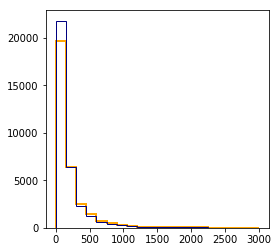

In [20]:
t1 = dr.loc[dr['ccdnum'] == 41]
t2 = dr.loc[dr['ccdnum'] == 28]
t1 = t1.loc[t1['type'] == 'circ']
t2 = t2.loc[t2['type'] == 'circ']

fig, ax = plt.subplots(figsize=(4, 4))
ax.hist(t1.loc[t1['LR'] == 'L', 'npix'].values, # / t1.loc[t1['LR'] == 'R', 'ptp'].values, 
        color='orange', histtype='step', lw=2, bins=20,  range=(0, 3000))
ax.hist(t2.loc[t2['LR'] == 'L', 'npix'].values, # / t2.loc[t2['LR'] == 'R', 'ptp'].values, 
        color='navy', histtype='step', bins=20, range=(0, 3000))


### Results:

1) a/b

2) var(left) / mad(left)

3) var(left) / ptp(left)

4) ptp(left) / ptp(right)

5) npix

the above made no difference when comapring CCD=41 against CCD=28, without labeling

The only one giving difference was: **var)left) / var(right)**